# OPER 785 04-01 Data Loading and Preprocessing

Practical Example

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [1]:
print("Welcome to OPER 785!")

Welcome to OPER 785!


This project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Importing data

*We're going to access, process, and perform a simple regression on a dataset using California housing attributes and prices.*

The data will be imported from our textbook author's github site: [https://github.com/ageron/data/raw/main/]

## Download the Data

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    # set path for data
    tarball_path = Path("datasets/housing.tgz")
    # check to see if directory  and data already exists
    if not tarball_path.is_file():
        # if directory does not exist, create it
        Path("datasets").mkdir(parents=True, exist_ok=True)
        # set URL to point at data
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        # grab the data
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            # extract into directory
            housing_tarball.extractall(path="datasets")
    # grab the unpacked data
    return pd.read_csv(Path("datasets/housing/housing.csv"))

# load the data into a pandas frame
housing = load_housing_data()

## Take a Quick Look at the Data Structure

Once you have the data, it's a good idea to see what you are dealing with. The next few blocks of code examine the data in a number of useful ways.

In [4]:
# Look at the first couple of lines of the data including the column headings
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
# Examine the data structures of the imported factors
#
# You should be able to tell if there are missing values and other potential issues such as
# unexpected data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# The function value_counts can show relative frequency of data
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# This works for numeric values as well, but for obvious reasons, it's probably not as useful
# for real-valued numbers
housing["total_rooms"].value_counts()

1527.0     18
1582.0     17
1613.0     17
2127.0     16
1717.0     15
           ..
7478.0      1
8207.0      1
21533.0     1
17032.0     1
10035.0     1
Name: total_rooms, Length: 5926, dtype: int64

In [8]:
# The describe() function will display some basic descriptive statistics of the numerical factors
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# Data visualization

The following cell is not shown either in the book. It creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [9]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Create histograms for factors of interest

Histograms are one way of looking at your data to see the potential distribution you are working with

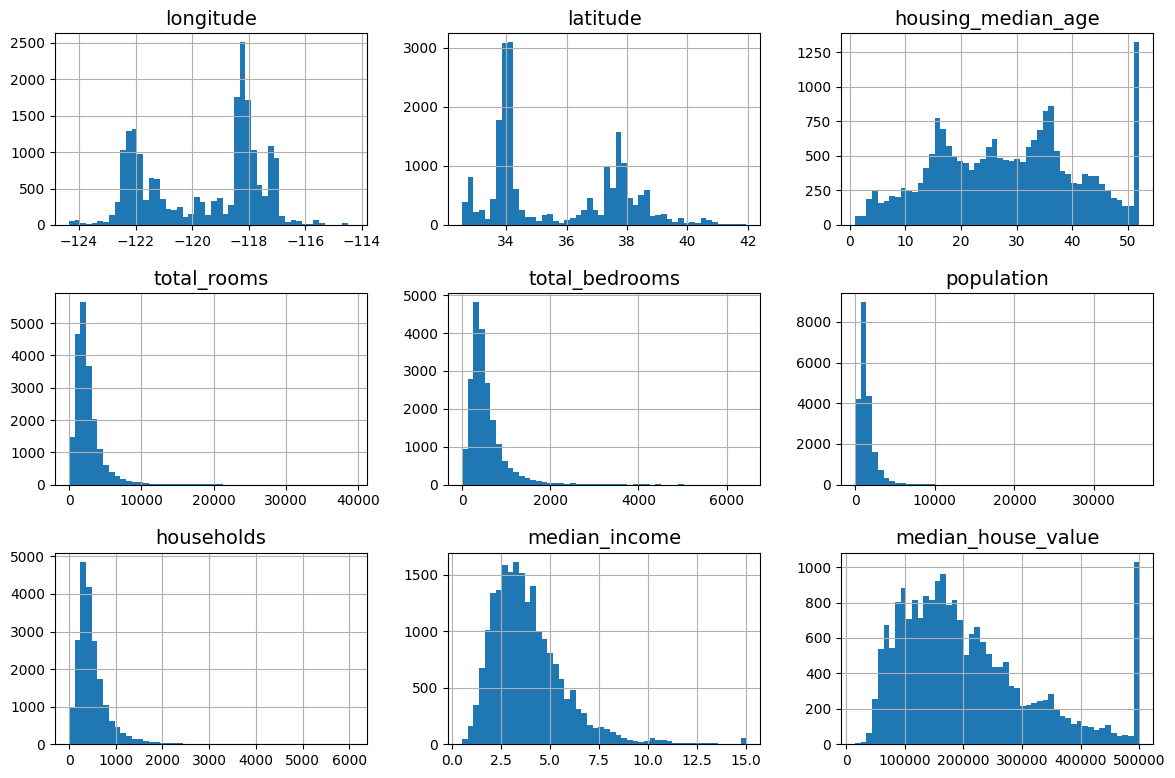

In [10]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set

In [12]:
# Useful code for creating training and test sets for data that is not pre-configured for such
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
# Setting a random seed should give you the same training/test split each time you run it
# this is not necessarily a great thing to do outside of the classroom or development testing

# Setting the same random seed should guarantee that we all get the same output provided we
# run the code in the same order as one another and the same number of times
np.random.seed(42)


train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(len(train_set))
train_set.head()

16512


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.22     32.75                34.0       6001.0          1111.0   
8267     -117.03     32.69                10.0        901.0           163.0   
17445    -122.27     37.74                28.0       6909.0          1554.0   
14265    -121.82     37.25                25.0       4021.0           634.0   
2271     -115.98     33.32                 8.0        240.0            46.0   

       population  households  median_income  median_house_value  \
14196      2654.0      1072.0         4.5878            291000.0   
8267        698.0       167.0         4.6648            156100.0   
17445      2974.0      1484.0         3.6875            353900.0   
14265      2178.0       650.0         5.1663            241200.0   
2271         63.0        24.0         1.4688             53800.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445        NEAR BAY  
14265       <1H OCEAN  
2271           INLAND

In [14]:
print(len(test_set))
test_set.head()

4128


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -122.38     40.67                10.0       2281.0           444.0   
3024     -118.37     33.83                35.0       1207.0           207.0   
15663    -117.24     32.72                39.0       3089.0           431.0   
20484    -118.44     34.05                18.0       4780.0          1192.0   
9814     -118.44     34.18                33.0       2127.0           414.0   

       population  households  median_income  median_house_value  \
20046      1274.0       438.0         2.2120             65600.0   
3024        601.0       213.0         4.7308            353400.0   
15663      1175.0       432.0         7.5925            466700.0   
20484      1886.0      1036.0         4.4674            500001.0   
9814       1056.0       391.0         4.3750            286100.0   

      ocean_proximity  
20046          INLAND  
3024        <1H OCEAN  
15663      NEAR OCEAN  
20484       <1H OCEAN  
9814        <1H OCEAN

## Looking for Correlations

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Scatter plots of the raw data to help visualize individual factors and factor vs. factor

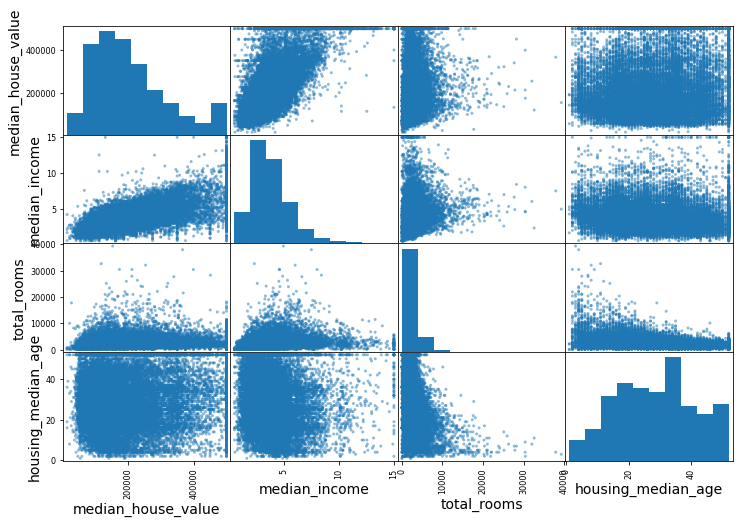

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

plt.show()

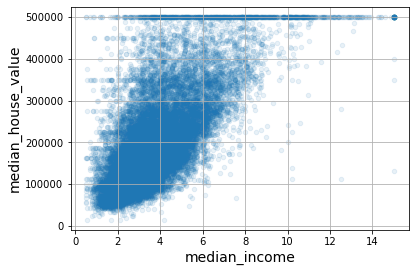

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

# Prepare the Data for Machine Learning Algorithms

Let's revert to the original training set and separate the target (note that `strat_train_set.drop()` creates a copy of `strat_train_set` without the column, it doesn't actually modify `strat_train_set` itself, unless you pass `inplace=True`):

In [21]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

## Data Cleaning

In the book 3 options are listed to handle the NaN values:

```python
housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [22]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9529     -118.31     33.94                40.0       1550.0             NaN   
16519    -117.86     34.01                16.0       4632.0             NaN   
19782    -119.75     34.45                 6.0       2864.0             NaN   
1343     -120.32     37.29                38.0        576.0             NaN   
9827     -121.85     36.61                38.0        238.0             NaN   

       population  households  median_income ocean_proximity  
9529        798.0       270.0         3.7750       <1H OCEAN  
16519      3038.0       727.0         5.1762       <1H OCEAN  
19782      1404.0       603.0         5.5073      NEAR OCEAN  
1343        478.0       112.0         2.3382          INLAND  
9827        191.0        67.0         1.3897       <1H OCEAN

In [23]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

housing_option1.loc[null_rows_idx].head()

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

In [24]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2

housing_option2.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  population  \
9529     -118.31     33.94                40.0       1550.0       798.0   
16519    -117.86     34.01                16.0       4632.0      3038.0   
19782    -119.75     34.45                 6.0       2864.0      1404.0   
1343     -120.32     37.29                38.0        576.0       478.0   
9827     -121.85     36.61                38.0        238.0       191.0   

       households  median_income ocean_proximity  
9529        270.0         3.7750       <1H OCEAN  
16519       727.0         5.1762       <1H OCEAN  
19782       603.0         5.5073      NEAR OCEAN  
1343        112.0         2.3382          INLAND  
9827         67.0         1.3897       <1H OCEAN

In [25]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9529     -118.31     33.94                40.0       1550.0           437.0   
16519    -117.86     34.01                16.0       4632.0           437.0   
19782    -119.75     34.45                 6.0       2864.0           437.0   
1343     -120.32     37.29                38.0        576.0           437.0   
9827     -121.85     36.61                38.0        238.0           437.0   

       population  households  median_income ocean_proximity  
9529        798.0       270.0         3.7750       <1H OCEAN  
16519      3038.0       727.0         5.1762       <1H OCEAN  
19782      1404.0       603.0         5.5073      NEAR OCEAN  
1343        478.0       112.0         2.3382          INLAND  
9827        191.0        67.0         1.3897       <1H OCEAN

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [26]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

ocean_proximity
14196      NEAR OCEAN
8267       NEAR OCEAN
17445        NEAR BAY
14265       <1H OCEAN
2271           INLAND
17848        NEAR BAY
6252           INLAND
9389        <1H OCEAN

In [27]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [28]:
housing_cat_encoded[:8]

array([[4.],
       [4.],
       [3.],
       [0.],
       [1.],
       [3.],
       [1.],
       [0.]])

In [29]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [31]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [32]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

Alternatively, you can set `sparse_output=False` when creating the `OneHotEncoder`:

In [35]:
# This works in Colab, but not in my standalone environment
cat_encoder = OneHotEncoder(sparce_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [38]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

## Putting it all together to create a data file we can use in a regression

In [ ]:
housing_num = housing.select_dtypes(include=[np.number])

## Feature Scaling

We're going to create 2 data sets based on the scaling techniques: min_max_scaler and standard_scalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [ ]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)